In [1]:
!pip install tensorflow
!pip install keras
!pip install np_utils
!pip install pandas
!pip install opencv-python
!pip install matplotlib
!pip install scikit-learn
!pip install seaborn

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from keras import layers
# CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# NASNet
from tensorflow.keras.applications import NASNetMobile
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

In [8]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory='/Malaria Dataset/cell_images/cell_images/',
    validation_split=0.2,
    subset='training',
    shuffle = True,
    seed=111,
    image_size=(224, 224),
    batch_size=32)

Found 27558 files belonging to 2 classes.
Using 22047 files for training.


In [9]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    directory='/Malaria Dataset/cell_images/cell_images/',
    validation_split=0.2,
    subset="validation",
    shuffle = True,
    seed=111,
    image_size=(224, 224),
    batch_size=32)

Found 27558 files belonging to 2 classes.
Using 5511 files for validation.


In [10]:
x_train = []
y_train = []
for images, labels in train_ds:
    x_train.append(images)
    y_train.append(labels)

# Convert to numpy arrays
x_train = tf.concat(x_train, axis=0)
y_train = tf.concat(y_train, axis=0)

# Extract data from val_ds
x_val = []
y_val = []
for images, labels in val_ds:
    x_val.append(images)
    y_val.append(labels)

# Convert to numpy arrays
x_val = tf.concat(x_val, axis=0)
y_val = tf.concat(y_val, axis=0)

# Print shapes for verification
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_val shape:", x_val.shape)
print("y_val shape:", y_val.shape)


x_train shape: (22047, 224, 224, 3)
y_train shape: (22047,)
x_val shape: (5511, 224, 224, 3)
y_val shape: (5511,)


In [11]:
# Assuming y_train and y_val are originally binary labels (0 or 1)
# Modify them to represent "Uninfected" (0) and "Parasitized" (1)

# Map labels to class names
class_names = ["Uninfected", "Parasitized"]

# Convert labels to class names
y_train_class_names = [class_names[label] for label in y_train.numpy()]
y_val_class_names = [class_names[label] for label in y_val.numpy()]

# Print a few examples for verification
print("Training labels (class names):", y_train_class_names[:10])
print("Validation labels (class names):", y_val_class_names[:10])


Training labels (class names): ['Uninfected', 'Parasitized', 'Parasitized', 'Parasitized', 'Uninfected', 'Parasitized', 'Parasitized', 'Uninfected', 'Parasitized', 'Parasitized']
Validation labels (class names): ['Uninfected', 'Uninfected', 'Parasitized', 'Uninfected', 'Parasitized', 'Parasitized', 'Uninfected', 'Parasitized', 'Parasitized', 'Uninfected']


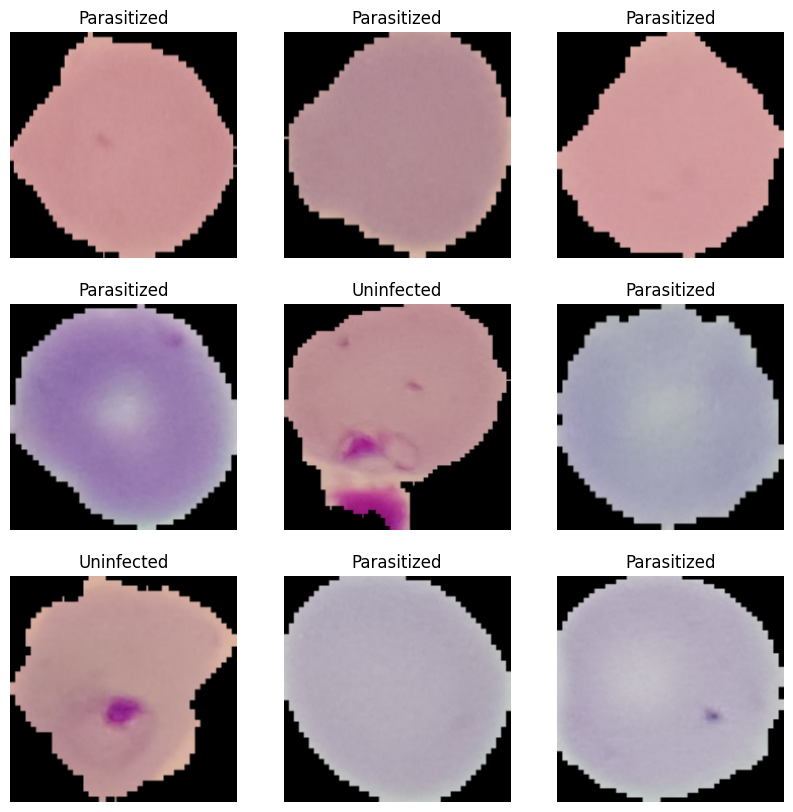

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [30]:
normalization_layer = layers.Rescaling(1./255)

In [31]:
# Create a data generator with normalization
train_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0 / 255.0  # Normalize pixel values to [0, 1]
)

val_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0 / 255.0  # Normalize pixel values to [0, 1]
)

# Apply the generator to the datasets
train_gen = train_data_gen.flow(x_train, y_train, batch_size=32)
val_gen = val_data_gen.flow(x_val, y_val, batch_size=32)


In [ ]:
                                                                    #CNN Model - Adam

In [104]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5)) 
model.add(Dense(1, activation='sigmoid'))  

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

epochs = 5  # You can adjust this based on your requirements
batch_size = 32

history = model.fit(
    train_gen,    validation_data=val_gen,    epochs=epochs,    batch_size=batch_size,    verbose=1
)

test_loss, test_accuracy = model.evaluate(x_val, y_val)
print(f"Test Accuracy: {test_accuracy:.4f}")

C:\Program Files\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_84 (Conv2D)                   │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_64 (MaxPooling2D)      │ (None, 111, 111, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_85 (Conv2D)                   │ (None, 109, 109, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_65 (MaxPooling2D)      │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_86 (Conv2D)                   │ (None, 52, 52, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_66 (MaxPooling2D)      │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_17 (Flatten)                 │ (None, 43264)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_68 (Dense)                     │ (None, 64)                  │       2,768,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_32 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_69 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,792,609 (10.65 MB)

 Trainable params: 2,792,609 (10.65 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 77s 110ms/step - accuracy: 0.6574 - loss: 0.6052 - val_accuracy: 0.9383 - val_loss: 0.2404
Epoch 2/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 76s 110ms/step - accuracy: 0.9265 - loss: 0.2493 - val_accuracy: 0.9439 - val_loss: 0.1731
Epoch 3/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 75s 109ms/step - accuracy: 0.9465 - loss: 0.1663 - val_accuracy: 0.9555 - val_loss: 0.1490
Epoch 4/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 75s 109ms/step - accuracy: 0.9557 - loss: 0.1355 - val_accuracy: 0.9552 - val_loss: 0.1456
Epoch 5/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 76s 111ms/step - accuracy: 0.9596 - loss: 0.1206 - val_accuracy: 0.9570 - val_loss: 0.1454
173/173 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.9462 - loss: 25.2402
Test Accuracy: 0.9459


In [105]:
model.save("CNN_Model - Adam.h5")

In [107]:
loaded_model = tf.keras.models.load_model("CNN_Model - Adam.h5")

In [108]:
loaded_model.evaluate(val_gen)

173/173 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9560 - loss: 0.1529


[0.14563284814357758, 0.9569951295852661]

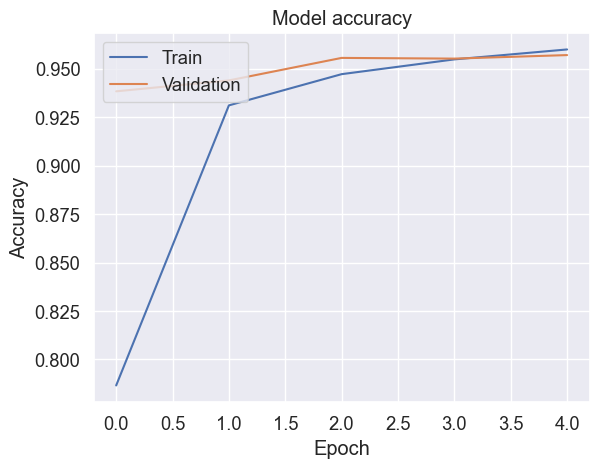

In [109]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

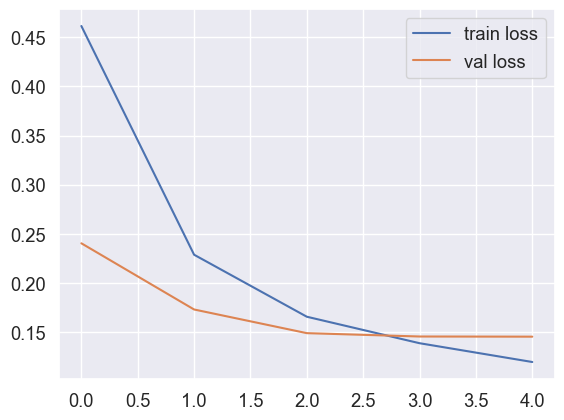

<Figure size 640x480 with 0 Axes>

In [110]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


173/173 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step


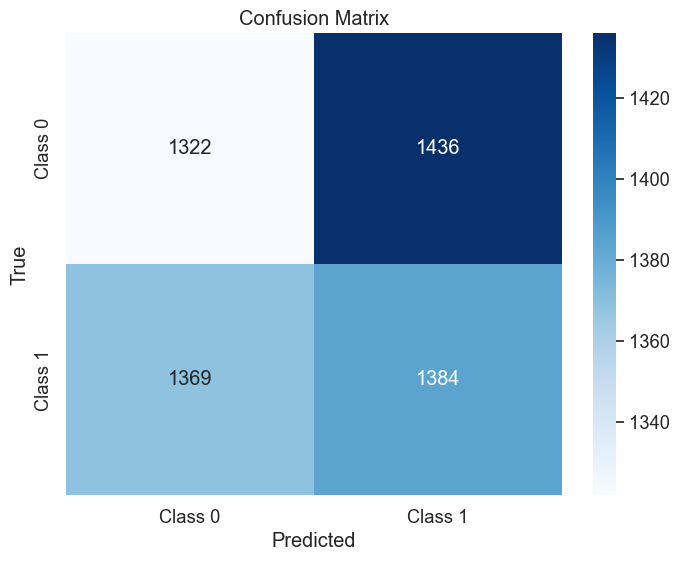

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

sns.set(font_scale=1.2)
y_val_pred = loaded_model.predict(val_gen)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)

confusion_mtx = confusion_matrix(y_val_actual, y_val_pred_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
                                                         #CNN Model - Nesterov Momentum

In [112]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid')) 

model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9, nesterov=True), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

epochs = 5  
batch_size = 32

history = model.fit(
    train_gen,    validation_data=val_gen,    epochs=epochs,    batch_size=batch_size,    verbose=1
)

test_loss, test_accuracy = model.evaluate(x_val, y_val)
print(f"Test Accuracy: {test_accuracy:.4f}")

C:\Program Files\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_87 (Conv2D)                   │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_67 (MaxPooling2D)      │ (None, 111, 111, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_88 (Conv2D)                   │ (None, 109, 109, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_68 (MaxPooling2D)      │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_89 (Conv2D)                   │ (None, 52, 52, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_69 (MaxPooling2D)      │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_18 (Flatten)                 │ (None, 43264)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_70 (Dense)                     │ (None, 64)                  │       2,768,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_33 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_71 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,792,609 (10.65 MB)

 Trainable params: 2,792,609 (10.65 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 73s 106ms/step - accuracy: 0.5668 - loss: 0.6783 - val_accuracy: 0.7766 - val_loss: 0.4899
Epoch 2/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 74s 107ms/step - accuracy: 0.5692 - loss: 0.6508 - val_accuracy: 0.5028 - val_loss: 0.6933
Epoch 3/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 74s 107ms/step - accuracy: 0.5003 - loss: 0.6933 - val_accuracy: 0.5028 - val_loss: 0.6931
Epoch 4/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 75s 109ms/step - accuracy: 0.5004 - loss: 0.6933 - val_accuracy: 0.4972 - val_loss: 0.6932
Epoch 5/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 74s 108ms/step - accuracy: 0.5216 - loss: 0.6912 - val_accuracy: 0.5787 - val_loss: 0.6686
173/173 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.5283 - loss: 58.9735
Test Accuracy: 0.5315


In [113]:
model.save("CNN_Model - Nesterov Momentum.h5")

In [114]:
loaded_model = tf.keras.models.load_model("CNN_Model - Nesterov Momentum.h5")

In [115]:
loaded_model.evaluate(val_gen)

173/173 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.5768 - loss: 0.6690


[0.6675883531570435, 0.5786608457565308]

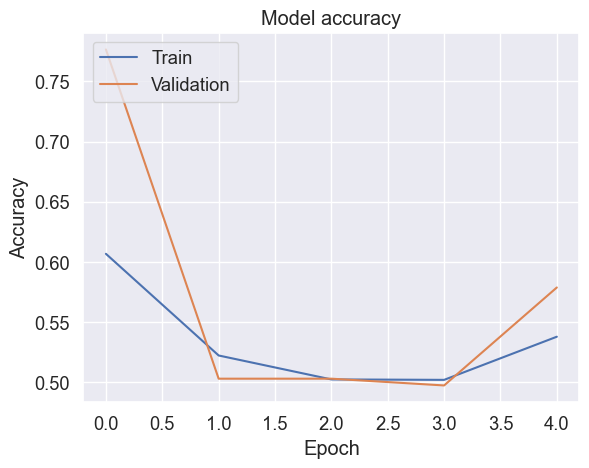

In [116]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

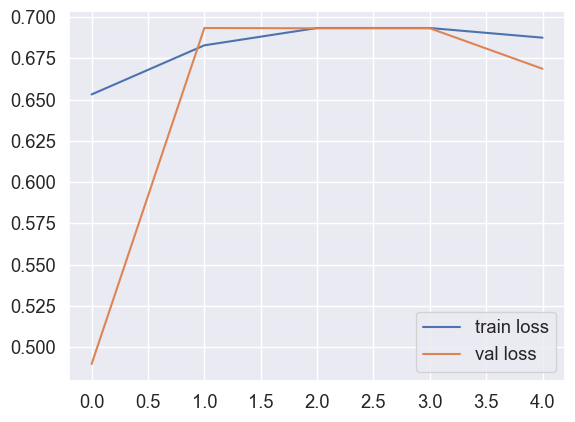

<Figure size 640x480 with 0 Axes>

In [117]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

173/173 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step


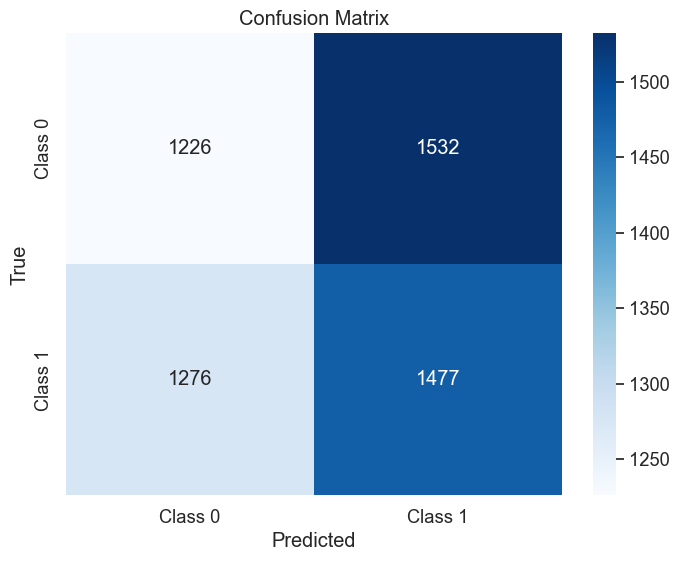

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

sns.set(font_scale=1.2)
y_val_pred = loaded_model.predict(val_gen)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)

confusion_mtx = confusion_matrix(y_val_actual, y_val_pred_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
                                                      #CNN Model - SGD Vanilla

In [119]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid')) 

model.compile(optimizer=SGD(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

epochs = 5  
batch_size = 32

history = model.fit(
    train_gen,    validation_data=val_gen,    epochs=epochs,    batch_size=batch_size,    verbose=1
)

test_loss, test_accuracy = model.evaluate(x_val, y_val)
print(f"Test Accuracy: {test_accuracy:.4f}")

C:\Program Files\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_90 (Conv2D)                   │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_70 (MaxPooling2D)      │ (None, 111, 111, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_91 (Conv2D)                   │ (None, 109, 109, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_71 (MaxPooling2D)      │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_92 (Conv2D)                   │ (None, 52, 52, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_72 (MaxPooling2D)      │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_19 (Flatten)                 │ (None, 43264)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_72 (Dense)                     │ (None, 64)                  │       2,768,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_34 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_73 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,792,609 (10.65 MB)

 Trainable params: 2,792,609 (10.65 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 72s 103ms/step - accuracy: 0.5592 - loss: 0.6811 - val_accuracy: 0.6674 - val_loss: 0.6210
Epoch 2/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 71s 103ms/step - accuracy: 0.6588 - loss: 0.6225 - val_accuracy: 0.8180 - val_loss: 0.4562
Epoch 3/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 72s 104ms/step - accuracy: 0.8410 - loss: 0.4261 - val_accuracy: 0.9292 - val_loss: 0.2158
Epoch 4/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 72s 104ms/step - accuracy: 0.9209 - loss: 0.2427 - val_accuracy: 0.8917 - val_loss: 0.2310
Epoch 5/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 71s 103ms/step - accuracy: 0.9292 - loss: 0.2145 - val_accuracy: 0.9198 - val_loss: 0.1826
173/173 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.8953 - loss: 25.7694
Test Accuracy: 0.8949


In [120]:
model.save("CNN_Model - SGD Vanilla.h5")

In [121]:
loaded_model = tf.keras.models.load_model("CNN_Model - SGD Vanilla.h5")

In [122]:
loaded_model.evaluate(val_gen)

173/173 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9203 - loss: 0.1867


[0.18468643724918365, 0.9197967648506165]

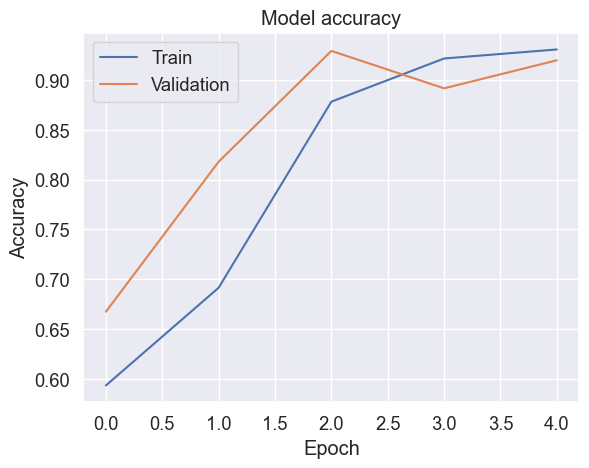

In [123]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

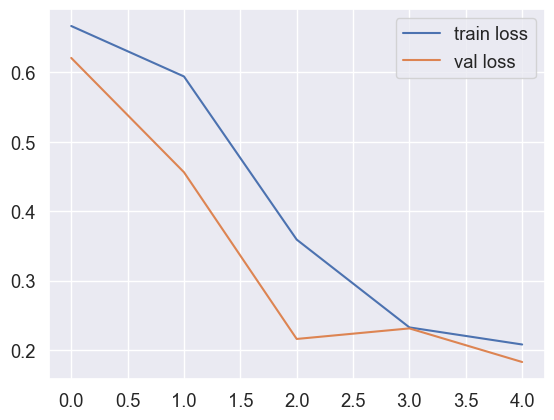

<Figure size 640x480 with 0 Axes>

In [124]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

173/173 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step


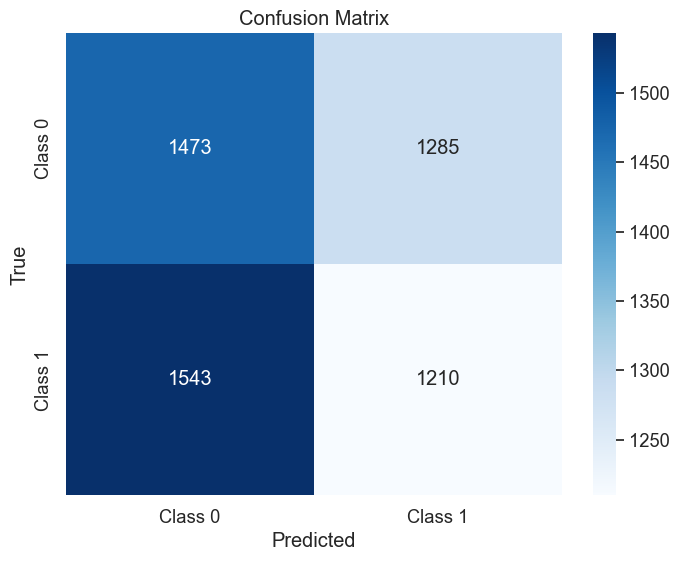

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

sns.set(font_scale=1.2)
y_val_pred = loaded_model.predict(val_gen)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)

confusion_mtx = confusion_matrix(y_val_actual, y_val_pred_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
                                                           #SeNet Model - ADAM

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D, Reshape, Multiply
from tensorflow.keras import Input

def SEBlock(input_feature, ratio=16):
    # Get the number of channels (filters) in the input feature
    channel_axis = -1
    channel = input_feature.shape[channel_axis]
    se = GlobalAveragePooling2D()(input_feature)
    se = Reshape((1, 1, channel))(se)    
    se = Dense(channel // ratio, activation='relu')(se)
    se = Dense(channel, activation='sigmoid')(se)
    se = Multiply()([input_feature, se])
    return se
    
model = Sequential()
input_shape = Input((224, 224, 3))
conv1 = Conv2D(16, (3, 3), activation='relu', padding='same')(input_shape)
conv1 = SEBlock(conv1)
conv1 = MaxPooling2D(2, 2)(conv1)
conv2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
conv2 = SEBlock(conv2)
conv2 = MaxPooling2D(2, 2)(conv2)
conv3 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
conv3 = SEBlock(conv3)
conv3 = MaxPooling2D(2, 2)(conv3)
flatten = Flatten()(conv3)
dense1 = Dense(64, activation='relu')(flatten)
dropout = Dropout(0.5)(dense1)
output = Dense(1, activation='sigmoid')(dropout) 
model = Model(inputs=input_shape, outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) 

model.summary()
epochs = 5  
batch_size = 32

history = model.fit(
    train_gen,     validation_data=val_gen,    epochs=epochs,    batch_size=batch_size,    verbose=1
)
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print(f"Test Accuracy: {test_accuracy:.4f}")

Model: "functional_101"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_15 (InputLayer)   │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_31 (Conv2D)            │ (None, 224, 224, 16)      │             448 │ input_layer_15[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ global_average_pooling2d_3    │ (None, 16)                │               0 │ conv2d_31[0][0]            │
│ (GlobalAveragePooling2D)      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ reshape_3 (Reshape)           │ (None, 1, 1, 16)          │               0 │ global_average_pooling2d_… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_29 (Dense)              │ (None, 1, 1, 1)           │              17 │ reshape_3[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_30 (Dense)              │ (None, 1, 1, 16)          │              32 │ dense_29[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ multiply_3 (Multiply)         │ (None, 224, 224, 16)      │               0 │ conv2d_31[0][0],           │
│                               │                           │                 │ dense_30[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_31              │ (None, 112, 112, 16)      │               0 │ multiply_3[0][0]           │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_32 (Conv2D)            │ (None, 112, 112, 32)      │           4,640 │ max_pooling2d_31[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ global_average_pooling2d_4    │ (None, 32)                │               0 │ conv2d_32[0][0]            │
│ (GlobalAveragePooling2D)      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ reshape_4 (Reshape)           │ (None, 1, 1, 32)          │               0 │ global_average_pooling2d_… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_31 (Dense)              │ (None, 1, 1, 2)           │              66 │ reshape_4[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_32 (Dense)              │ (None, 1, 1, 32)          │              96 │ dense_31[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ multiply_4 (Multiply)         │ (None, 112, 112, 32)      │               0 │ conv2d_32[0][0],           │
│                               │                           │                 │ dense_32[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_32              │ (None, 56, 56, 32)        │               

 Total params: 3,235,768 (12.34 MB)

 Trainable params: 3,235,768 (12.34 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 154s 220ms/step - accuracy: 0.6006 - loss: 0.6490 - val_accuracy: 0.9125 - val_loss: 0.2914
Epoch 2/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 149s 217ms/step - accuracy: 0.9206 - loss: 0.2658 - val_accuracy: 0.9481 - val_loss: 0.1620
Epoch 3/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 149s 217ms/step - accuracy: 0.9530 - loss: 0.1594 - val_accuracy: 0.9594 - val_loss: 0.1379
Epoch 4/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 149s 216ms/step - accuracy: 0.9576 - loss: 0.1431 - val_accuracy: 0.9610 - val_loss: 0.1381
Epoch 5/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 149s 216ms/step - accuracy: 0.9606 - loss: 0.1207 - val_accuracy: 0.9612 - val_loss: 0.1346
173/173 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.5028 - loss: 2920.4370
Test Accuracy: 0.5028


In [44]:
model.save("SeNet Model - Adam.h5")

In [45]:
loaded_model = tf.keras.models.load_model("SeNet Model - Adam.h5")

In [46]:
loaded_model.evaluate(val_gen)

173/173 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - accuracy: 0.9625 - loss: 0.1319


[0.13519187271595, 0.9611685872077942]

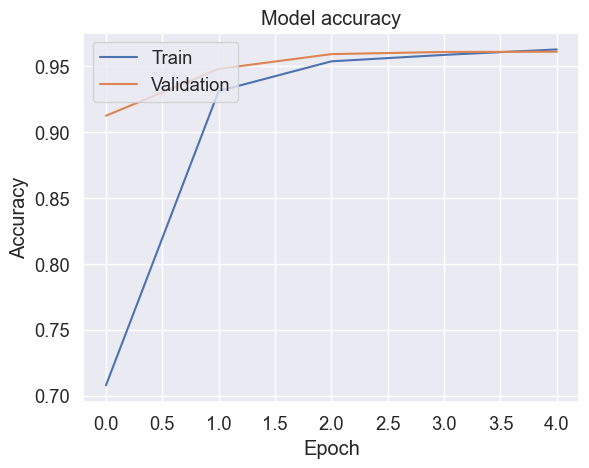

In [47]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

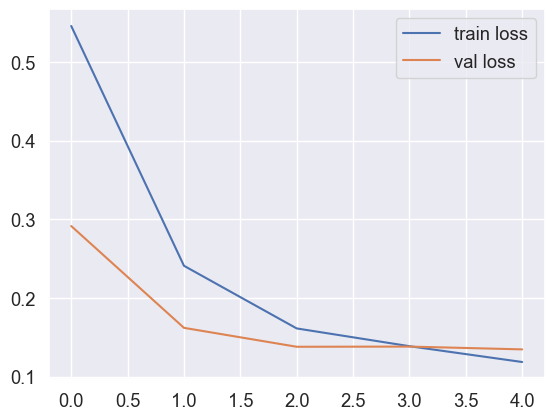

<Figure size 640x480 with 0 Axes>

In [48]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

173/173 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step


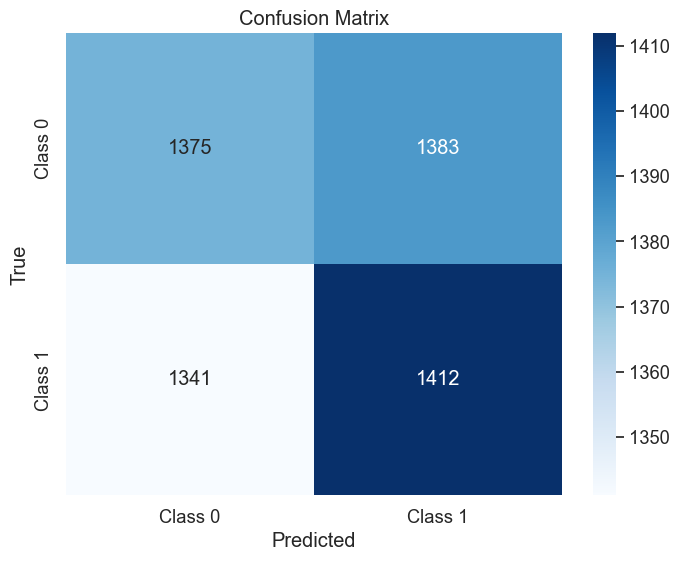

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

sns.set(font_scale=1.2)
y_val_pred = loaded_model.predict(val_gen)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)

confusion_mtx = confusion_matrix(y_val_actual, y_val_pred_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
                                                           #SeNet Model - Nesterov Momentum

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D, Reshape, Multiply
from tensorflow.keras import Input

def SEBlock(input_feature, ratio=16):
    channel_axis = -1
    channel = input_feature.shape[channel_axis]    
    se = GlobalAveragePooling2D()(input_feature)
    se = Reshape((1, 1, channel))(se)    
    se = Dense(channel // ratio, activation='relu')(se)
    se = Dense(channel, activation='sigmoid')(se)    
    se = Multiply()([input_feature, se])
    return se

model = Sequential()

input_shape = Input((224, 224, 3))
conv1 = Conv2D(16, (3, 3), activation='relu', padding='same')(input_shape)
conv1 = SEBlock(conv1)
conv1 = MaxPooling2D(2, 2)(conv1)
conv2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
conv2 = SEBlock(conv2)
conv2 = MaxPooling2D(2, 2)(conv2)
conv3 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
conv3 = SEBlock(conv3)
conv3 = MaxPooling2D(2, 2)(conv3)
flatten = Flatten()(conv3)
dense1 = Dense(64, activation='relu')(flatten)
dropout = Dropout(0.5)(dense1)  

output = Dense(1, activation='sigmoid')(dropout)  #
model = Model(inputs=input_shape, outputs=output)
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9, nesterov=True), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

epochs = 5  # You can adjust this based on your requirements
batch_size = 32

history = model.fit(
    train_gen,validation_data=val_gen,    epochs=epochs,    batch_size=batch_size,    verbose=1
)

test_loss, test_accuracy = model.evaluate(x_val, y_val)
print(f"Test Accuracy: {test_accuracy:.4f}")

Model: "functional_99"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)   │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_28 (Conv2D)            │ (None, 224, 224, 16)      │             448 │ input_layer_14[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ global_average_pooling2d      │ (None, 16)                │               0 │ conv2d_28[0][0]            │
│ (GlobalAveragePooling2D)      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ reshape (Reshape)             │ (None, 1, 1, 16)          │               0 │ global_average_pooling2d[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_21 (Dense)              │ (None, 1, 1, 1)           │              17 │ reshape[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_22 (Dense)              │ (None, 1, 1, 16)          │              32 │ dense_21[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ multiply (Multiply)           │ (None, 224, 224, 16)      │               0 │ conv2d_28[0][0],           │
│                               │                           │                 │ dense_22[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_28              │ (None, 112, 112, 16)      │               0 │ multiply[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_29 (Conv2D)            │ (None, 112, 112, 32)      │           4,640 │ max_pooling2d_28[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ global_average_pooling2d_1    │ (None, 32)                │               0 │ conv2d_29[0][0]            │
│ (GlobalAveragePooling2D)      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ reshape_1 (Reshape)           │ (None, 1, 1, 32)          │               0 │ global_average_pooling2d_… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_23 (Dense)              │ (None, 1, 1, 2)           │              66 │ reshape_1[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_24 (Dense)              │ (None, 1, 1, 32)          │              96 │ dense_23[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ multiply_1 (Multiply)         │ (None, 112, 112, 32)      │               0 │ conv2d_29[0][0],           │
│                               │                           │                 │ dense_24[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_29              │ (None, 56, 56, 32)        │               

 Total params: 3,235,768 (12.34 MB)

 Trainable params: 3,235,768 (12.34 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 146s 209ms/step - accuracy: 0.5624 - loss: 0.6746 - val_accuracy: 0.9114 - val_loss: 0.3645
Epoch 2/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 143s 208ms/step - accuracy: 0.9083 - loss: 0.2803 - val_accuracy: 0.9443 - val_loss: 0.1854
Epoch 3/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 145s 211ms/step - accuracy: 0.9330 - loss: 0.2208 - val_accuracy: 0.9456 - val_loss: 0.1795
Epoch 4/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 145s 210ms/step - accuracy: 0.9356 - loss: 0.2009 - val_accuracy: 0.9450 - val_loss: 0.1686
Epoch 5/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 143s 208ms/step - accuracy: 0.9417 - loss: 0.1865 - val_accuracy: 0.9470 - val_loss: 0.1696
173/173 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - accuracy: 0.5061 - loss: 256.1461
Test Accuracy: 0.5068


In [23]:
model.save("SeNet Model - Nesterov Momentum.h5")

In [24]:
loaded_model = tf.keras.models.load_model("SeNet Model - Nesterov Momentum.h5")

In [25]:
loaded_model.evaluate(val_gen)

173/173 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - accuracy: 0.9492 - loss: 0.1562


[0.16767346858978271, 0.9470150470733643]

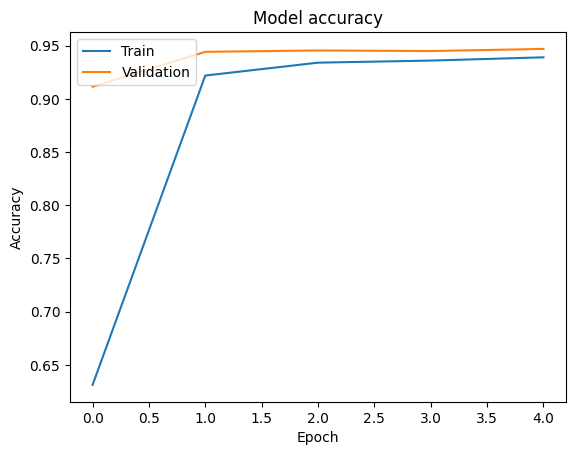

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


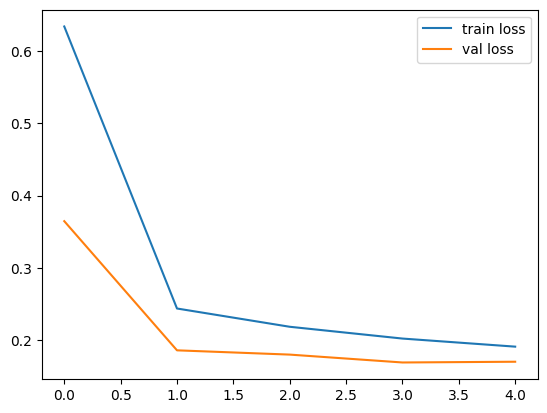

<Figure size 640x480 with 0 Axes>

In [27]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

173/173 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step


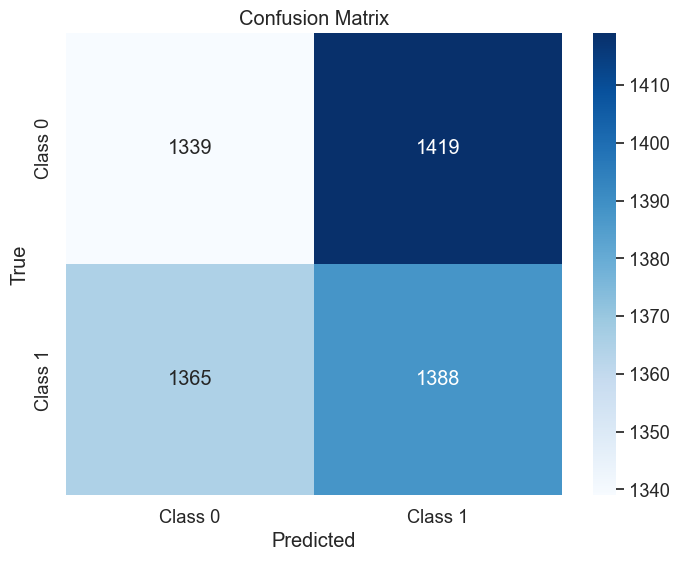

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

sns.set(font_scale=1.2)
y_val_pred = loaded_model.predict(val_gen)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)

confusion_mtx = confusion_matrix(y_val_actual, y_val_pred_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
                                                    #SeNet Model - SGD Vanilla

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D, Reshape, Multiply
from tensorflow.keras import Input

def SEBlock(input_feature, ratio=16):
    channel_axis = -1
    channel = input_feature.shape[channel_axis]    
    se = GlobalAveragePooling2D()(input_feature)
    se = Reshape((1, 1, channel))(se)
    se = Dense(channel // ratio, activation='relu')(se)
    se = Dense(channel, activation='sigmoid')(se)
    se = Multiply()([input_feature, se])
    return se
model = Sequential()

input_shape = Input((224, 224, 3))
conv1 = Conv2D(16, (3, 3), activation='relu', padding='same')(input_shape)
conv1 = SEBlock(conv1)
conv1 = MaxPooling2D(2, 2)(conv1)
conv2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
conv2 = SEBlock(conv2)
conv2 = MaxPooling2D(2, 2)(conv2)
conv3 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
conv3 = SEBlock(conv3)
conv3 = MaxPooling2D(2, 2)(conv3)

flatten = Flatten()(conv3)

dense1 = Dense(64, activation='relu')(flatten)
dropout = Dropout(0.5)(dense1)
output = Dense(1, activation='sigmoid')(dropout) 
model = Model(inputs=input_shape, outputs=output)
model.compile(optimizer=SGD(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

epochs = 5  
batch_size = 32

history = model.fit(
    train_gen,    validation_data=val_gen,    epochs=epochs,    batch_size=batch_size,    verbose=1
)
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print(f"Test Accuracy: {test_accuracy:.4f}")

Model: "functional_103"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_16 (InputLayer)   │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_34 (Conv2D)            │ (None, 224, 224, 16)      │             448 │ input_layer_16[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ global_average_pooling2d_6    │ (None, 16)                │               0 │ conv2d_34[0][0]            │
│ (GlobalAveragePooling2D)      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ reshape_6 (Reshape)           │ (None, 1, 1, 16)          │               0 │ global_average_pooling2d_… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_37 (Dense)              │ (None, 1, 1, 1)           │              17 │ reshape_6[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_38 (Dense)              │ (None, 1, 1, 16)          │              32 │ dense_37[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ multiply_6 (Multiply)         │ (None, 224, 224, 16)      │               0 │ conv2d_34[0][0],           │
│                               │                           │                 │ dense_38[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_34              │ (None, 112, 112, 16)      │               0 │ multiply_6[0][0]           │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_35 (Conv2D)            │ (None, 112, 112, 32)      │           4,640 │ max_pooling2d_34[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ global_average_pooling2d_7    │ (None, 32)                │               0 │ conv2d_35[0][0]            │
│ (GlobalAveragePooling2D)      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ reshape_7 (Reshape)           │ (None, 1, 1, 32)          │               0 │ global_average_pooling2d_… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_39 (Dense)              │ (None, 1, 1, 2)           │              66 │ reshape_7[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_40 (Dense)              │ (None, 1, 1, 32)          │              96 │ dense_39[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ multiply_7 (Multiply)         │ (None, 112, 112, 32)      │               0 │ conv2d_35[0][0],           │
│                               │                           │                 │ dense_40[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_35              │ (None, 56, 56, 32)        │               

 Total params: 3,235,768 (12.34 MB)

 Trainable params: 3,235,768 (12.34 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 147s 212ms/step - accuracy: 0.5258 - loss: 0.6925 - val_accuracy: 0.5905 - val_loss: 0.6887
Epoch 2/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 146s 212ms/step - accuracy: 0.5780 - loss: 0.6868 - val_accuracy: 0.6327 - val_loss: 0.6660
Epoch 3/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 144s 209ms/step - accuracy: 0.6049 - loss: 0.6654 - val_accuracy: 0.6572 - val_loss: 0.6305
Epoch 4/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 142s 206ms/step - accuracy: 0.6281 - loss: 0.6447 - val_accuracy: 0.6668 - val_loss: 0.6160
Epoch 5/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 145s 210ms/step - accuracy: 0.6451 - loss: 0.6287 - val_accuracy: 0.6834 - val_loss: 0.5979
173/173 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.5061 - loss: 78.6588
Test Accuracy: 0.5052


In [51]:
model.save("SeNet Model - SGD Vanilla.h5")

In [52]:
loaded_model = tf.keras.models.load_model("SeNet Model - SGD Vanilla.h5")

In [53]:
loaded_model.evaluate(val_gen)

173/173 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - accuracy: 0.6740 - loss: 0.6025


[0.5980681777000427, 0.6833605766296387]

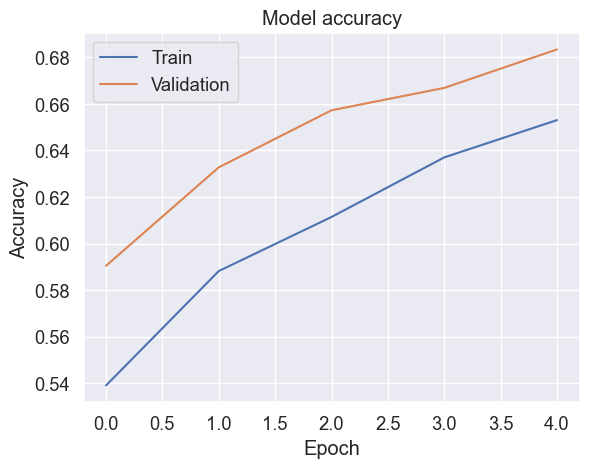

In [54]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

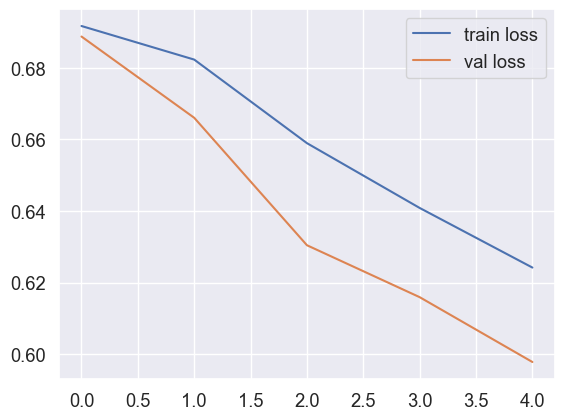

<Figure size 640x480 with 0 Axes>

In [55]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

173/173 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step


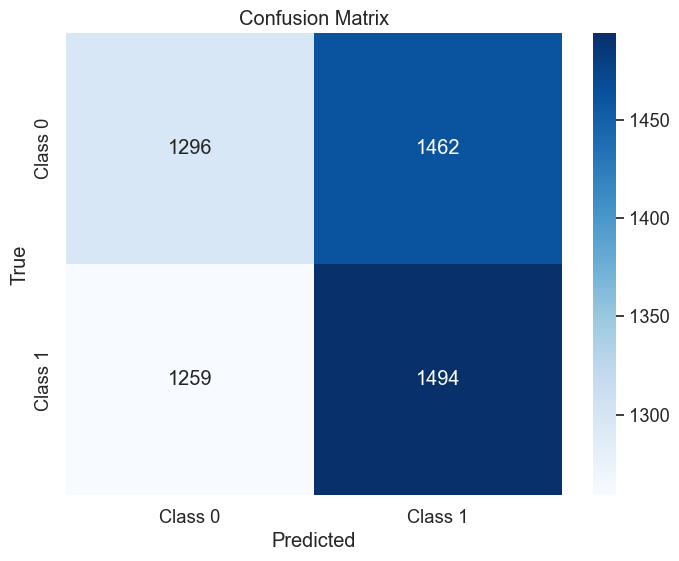

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

sns.set(font_scale=1.2)
y_val_pred = loaded_model.predict(val_gen)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)

confusion_mtx = confusion_matrix(y_val_actual, y_val_pred_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
                                                           #ResNet Model - ADAM

In [57]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet152
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Conv2D, MaxPooling2D

base_model = ResNet152(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(224,224,3),activation='relu',padding="same"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(224,224,3),activation='relu',padding="same"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Conv2D(filters=128, kernel_size=(3,3),input_shape=(224,224,3),activation='relu',padding="same"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Conv2D(filters=256, kernel_size=(3,3),input_shape=(224,224,3),activation='relu',padding="same"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam' ,metrics=["accuracy"])
model.summary()

epochs = 5  # You can adjust this based on your requirements
batch_size = 32

history = model.fit(
    train_gen,    validation_data=val_gen,    epochs=epochs,    batch_size=batch_size,    verbose=1
)

test_loss, test_accuracy = model.evaluate(x_val, y_val)
print(f"Test Accuracy: {test_accuracy:.4f}")

C:\Program Files\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_37 (Conv2D)                   │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_37 (MaxPooling2D)      │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_38 (MaxPooling2D)      │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_39 (MaxPooling2D)      │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_40 (Conv2D)                   │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_40 (MaxPooling2D)      │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 128)                 │       6,422,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 50)                  │           6,450 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,817,573 (26.01 MB)

 Trainable params: 6,817,573 (26.01 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 236s 340ms/step - accuracy: 0.6852 - loss: 0.5374 - val_accuracy: 0.9537 - val_loss: 0.1560
Epoch 2/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 224s 325ms/step - accuracy: 0.9527 - loss: 0.1570 - val_accuracy: 0.9574 - val_loss: 0.1374
Epoch 3/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 224s 325ms/step - accuracy: 0.9590 - loss: 0.1323 - val_accuracy: 0.9597 - val_loss: 0.1327
Epoch 4/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 225s 326ms/step - accuracy: 0.9567 - loss: 0.1266 - val_accuracy: 0.9572 - val_loss: 0.1533
Epoch 5/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 225s 327ms/step - accuracy: 0.9619 - loss: 0.1178 - val_accuracy: 0.9586 - val_loss: 0.1347
173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 86ms/step - accuracy: 0.8602 - loss: 22.8009
Test Accuracy: 0.8608


In [58]:
model.save("ResNet Model - ADAM.h5")

In [59]:
loaded_model = tf.keras.models.load_model("ResNet Model - ADAM.h5")

In [60]:
loaded_model.evaluate(val_gen)

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step - accuracy: 0.9558 - loss: 0.1405


[0.13540613651275635, 0.9586281776428223]

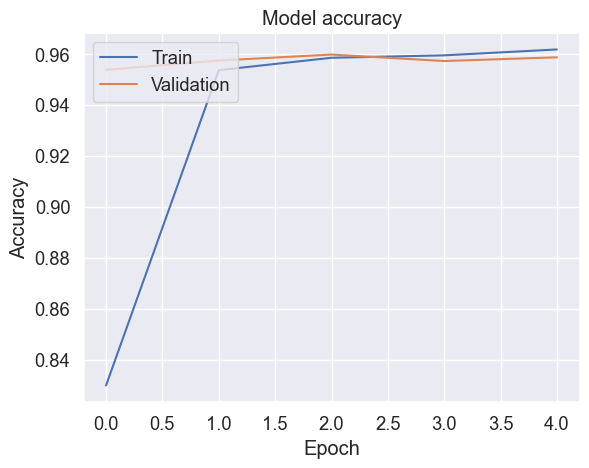

In [61]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

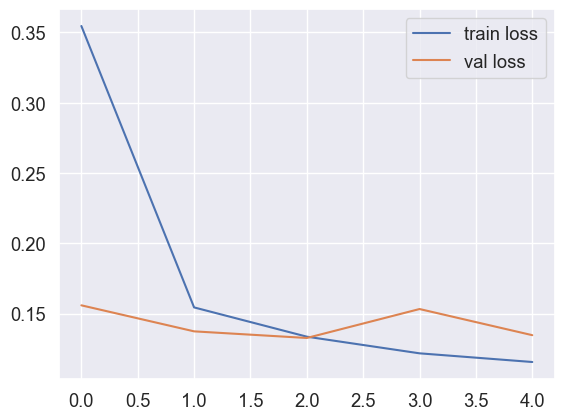

<Figure size 640x480 with 0 Axes>

In [62]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

173/173 ━━━━━━━━━━━━━━━━━━━━ 16s 90ms/step


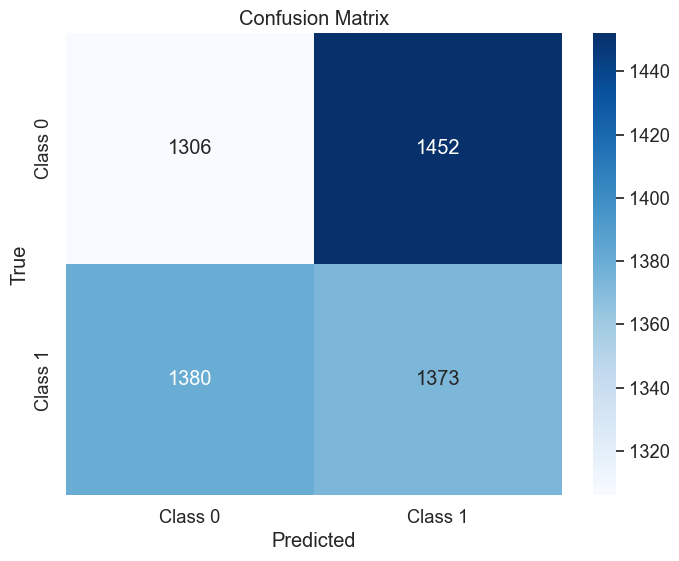

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

sns.set(font_scale=1.2)
y_val_pred = loaded_model.predict(val_gen)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)

confusion_mtx = confusion_matrix(y_val_actual, y_val_pred_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
                                                        #ResNet Model - Nesterov Momentum

In [10]:
from tensorflow.keras.applications import ResNet152
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD

base_model = ResNet152(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(224,224,3),activation='relu',padding="same"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(224,224,3),activation='relu',padding="same"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Conv2D(filters=128, kernel_size=(3,3),input_shape=(224,224,3),activation='relu',padding="same"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Conv2D(filters=256, kernel_size=(3,3),input_shape=(224,224,3),activation='relu',padding="same"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9, nesterov=True), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

epochs = 5 
batch_size = 32

history = model.fit(
    train_gen,    validation_data=val_gen,    epochs=epochs,    batch_size=batch_size,    verbose=1
)

test_loss, test_accuracy = model.evaluate(x_val, y_val)
print(f"Test Accuracy: {test_accuracy:.4f}")

C:\Program Files\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       6,422,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 50)                  │           6,450 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,817,573 (26.01 MB)

 Trainable params: 6,817,573 (26.01 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5


C:\Program Files\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


689/689 ━━━━━━━━━━━━━━━━━━━━ 223s 322ms/step - accuracy: 0.5694 - loss: 0.6702 - val_accuracy: 0.9363 - val_loss: 0.1962
Epoch 2/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 219s 318ms/step - accuracy: 0.9344 - loss: 0.2064 - val_accuracy: 0.9561 - val_loss: 0.1561
Epoch 3/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 217s 315ms/step - accuracy: 0.9548 - loss: 0.1504 - val_accuracy: 0.9612 - val_loss: 0.1311
Epoch 4/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 218s 316ms/step - accuracy: 0.9584 - loss: 0.1325 - val_accuracy: 0.9577 - val_loss: 0.1402
Epoch 5/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 218s 316ms/step - accuracy: 0.9626 - loss: 0.1177 - val_accuracy: 0.9599 - val_loss: 0.1328
173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 84ms/step - accuracy: 0.5499 - loss: 72.4695
Test Accuracy: 0.5502


In [11]:
model.save("ResNet Model - Nesterov Momentum.h5")

In [12]:
loaded_model = tf.keras.models.load_model("ResNet Model - Nesterov Momentum.h5")

In [13]:
loaded_model.evaluate(val_gen)

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 86ms/step - accuracy: 0.9569 - loss: 0.1372


[0.1317148506641388, 0.9598984122276306]

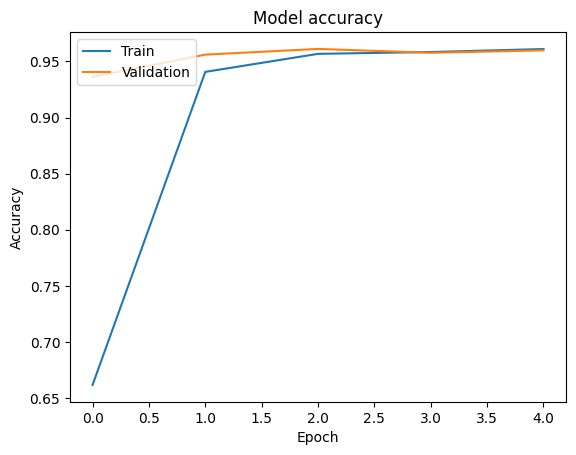

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

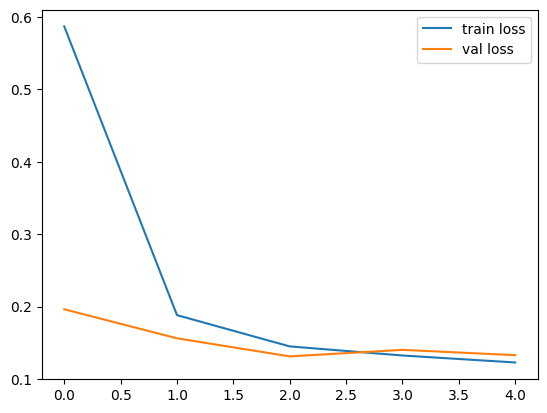

<Figure size 640x480 with 0 Axes>

In [15]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have actual ground truth labels for validation data (y_val_actual)
y_val_pred = model.predict(val_gen)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)

confusion_mtx = confusion_matrix(y_val_actual, y_val_pred_binary)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 87ms/step


NameError: name 'y_val_actual' is not defined

In [ ]:
                                                           #ResNet Model - SGD Vanilla

In [22]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet152
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Conv2D, MaxPooling2D

base_model = ResNet152(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(224,224,3),activation='relu',padding="same"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(224,224,3),activation='relu',padding="same"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Conv2D(filters=128, kernel_size=(3,3),input_shape=(224,224,3),activation='relu',padding="same"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Conv2D(filters=256, kernel_size=(3,3),input_shape=(224,224,3),activation='relu',padding="same"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
# Adding dropout to minimize overfitting issue
model.add(Dropout(0.2))
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

epochs = 5  
batch_size = 32
history = model.fit(
    train_gen,    validation_data=val_gen,    epochs=epochs,    batch_size=batch_size,    verbose=1
)
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print(f"Test Accuracy: {test_accuracy:.4f}")

C:\Program Files\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │       6,422,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 50)                  │           6,450 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,817,573 (26.01 MB)

 Trainable params: 6,817,573 (26.01 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 217s 314ms/step - accuracy: 0.5317 - loss: 0.6893 - val_accuracy: 0.6473 - val_loss: 0.6452
Epoch 2/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 214s 310ms/step - accuracy: 0.6439 - loss: 0.6358 - val_accuracy: 0.8459 - val_loss: 0.4037
Epoch 3/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 215s 311ms/step - accuracy: 0.8703 - loss: 0.3723 - val_accuracy: 0.9390 - val_loss: 0.1808
Epoch 4/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 216s 313ms/step - accuracy: 0.9292 - loss: 0.2151 - val_accuracy: 0.9454 - val_loss: 0.1708
Epoch 5/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 213s 309ms/step - accuracy: 0.9409 - loss: 0.1843 - val_accuracy: 0.9336 - val_loss: 0.1773
173/173 ━━━━━━━━━━━━━━━━━━━━ 14s 83ms/step - accuracy: 0.4941 - loss: 378.7960
Test Accuracy: 0.4966


In [23]:
model.save("ResNet Model - SGD Vanilla.h5")

In [24]:
loaded_model = tf.keras.models.load_model("ResNet Model - SGD Vanilla.h5")

In [25]:
loaded_model.evaluate(val_gen)

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 86ms/step - accuracy: 0.9291 - loss: 0.1873


[0.1769155114889145, 0.933587372303009]

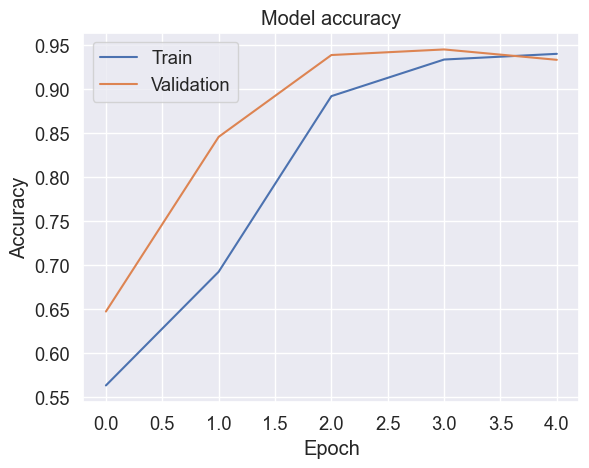

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

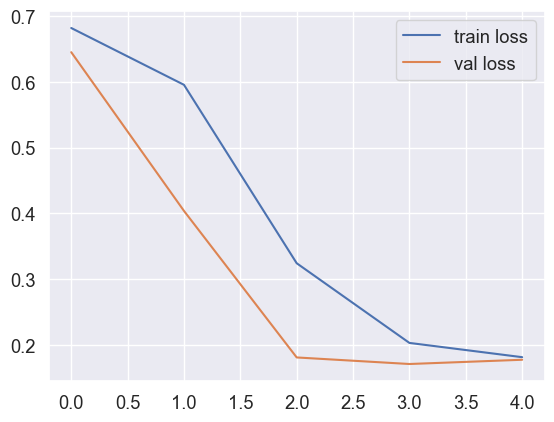

<Figure size 640x480 with 0 Axes>

In [27]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

sns.set(font_scale=1.2)
y_val_pred = loaded_model.predict(val_gen)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)

confusion_mtx = confusion_matrix(y_val_actual, y_val_pred_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 87ms/step


NameError: name 'y_val_actual' is not defined

In [ ]:
                                                           #Xception Model - Adam

In [80]:
import tensorflow as tf
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential

base_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(224,224,3),activation='relu',padding="same"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(224,224,3),activation='relu',padding="same"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Conv2D(filters=128, kernel_size=(3,3),input_shape=(224,224,3),activation='relu',padding="same"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Conv2D(filters=256, kernel_size=(3,3),input_shape=(224,224,3),activation='relu',padding="same"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
# Adding dropout to minimize overfitting issue
model.add(Dropout(0.2))
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam' ,metrics=["accuracy"])
model.summary()

epochs = 5  # You can adjust this based on your requirements
batch_size = 32

history = model.fit(
    train_gen,    validation_data=val_gen,    epochs=epochs,    batch_size=batch_size,    verbose=1
)
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print(f"Test Accuracy: {test_accuracy:.4f}")

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_64 (Conv2D)                   │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_52 (MaxPooling2D)      │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_65 (Conv2D)                   │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_53 (MaxPooling2D)      │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_66 (Conv2D)                   │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_54 (MaxPooling2D)      │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_67 (Conv2D)                   │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_55 (MaxPooling2D)      │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_14 (Flatten)                 │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_59 (Dense)                     │ (None, 128)                 │       6,422,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_60 (Dense)                     │ (None, 50)                  │           6,450 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_61 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,817,573 (26.01 MB)

 Trainable params: 6,817,573 (26.01 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 234s 337ms/step - accuracy: 0.6123 - loss: 0.6094 - val_accuracy: 0.9581 - val_loss: 0.1469
Epoch 2/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 231s 335ms/step - accuracy: 0.9538 - loss: 0.1594 - val_accuracy: 0.9554 - val_loss: 0.1466
Epoch 3/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 229s 332ms/step - accuracy: 0.9577 - loss: 0.1357 - val_accuracy: 0.9623 - val_loss: 0.1266
Epoch 4/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 222s 322ms/step - accuracy: 0.9631 - loss: 0.1191 - val_accuracy: 0.9614 - val_loss: 0.1488
Epoch 5/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 224s 325ms/step - accuracy: 0.9630 - loss: 0.1195 - val_accuracy: 0.9592 - val_loss: 0.1358
173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 84ms/step - accuracy: 0.9561 - loss: 26.4112
Test Accuracy: 0.9534


In [81]:
model.save("Xception Model - Adam.h5")

In [82]:
loaded_model = tf.keras.models.load_model("Xception Model - Adam.h5")

In [83]:
loaded_model.evaluate(val_gen)

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 84ms/step - accuracy: 0.9607 - loss: 0.1247


[0.13697868585586548, 0.9591725468635559]

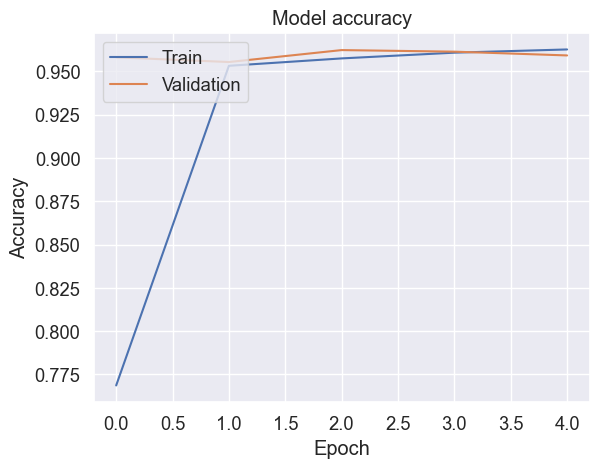

In [84]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

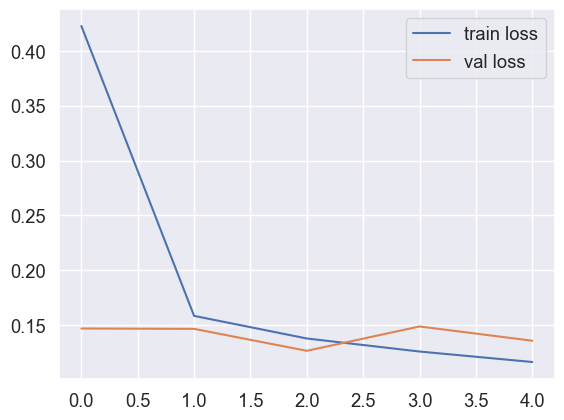

<Figure size 640x480 with 0 Axes>

In [85]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 87ms/step


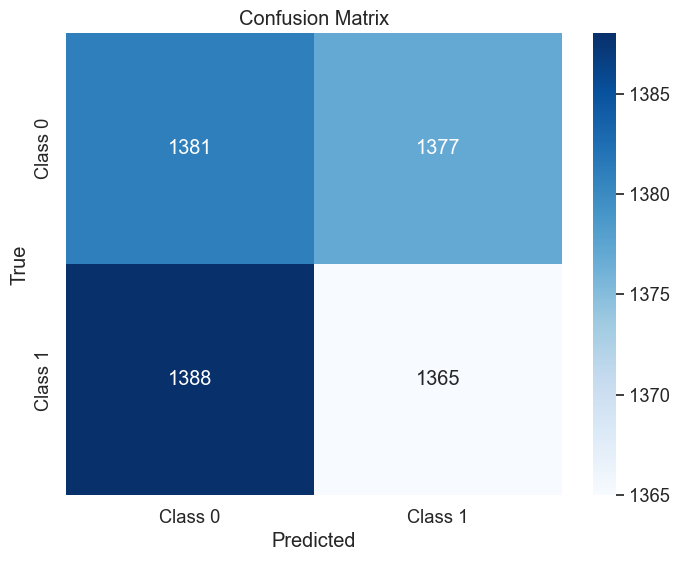

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

sns.set(font_scale=1.2)
y_val_pred = loaded_model.predict(val_gen)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)

confusion_mtx = confusion_matrix(y_val_actual, y_val_pred_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
                                                           #Xception Model - Nesterov Momentum

In [90]:
import tensorflow as tf
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential

base_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(224,224,3),activation='relu',padding="same"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(224,224,3),activation='relu',padding="same"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Conv2D(filters=128, kernel_size=(3,3),input_shape=(224,224,3),activation='relu',padding="same"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Conv2D(filters=256, kernel_size=(3,3),input_shape=(224,224,3),activation='relu',padding="same"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
# Adding dropout to minimize overfitting issue
model.add(Dropout(0.2))
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9, nesterov=True), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

epochs = 5 
batch_size = 32

history = model.fit(
    train_gen,    validation_data=val_gen,    epochs=epochs,    batch_size=batch_size,    verbose=1
)
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print(f"Test Accuracy: {test_accuracy:.4f}")

C:\Program Files\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_72 (Conv2D)                   │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_56 (MaxPooling2D)      │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_73 (Conv2D)                   │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_57 (MaxPooling2D)      │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_74 (Conv2D)                   │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_58 (MaxPooling2D)      │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_75 (Conv2D)                   │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_59 (MaxPooling2D)      │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_15 (Flatten)                 │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_62 (Dense)                     │ (None, 128)                 │       6,422,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_63 (Dense)                     │ (None, 50)                  │           6,450 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_64 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,817,573 (26.01 MB)

 Trainable params: 6,817,573 (26.01 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 218s 316ms/step - accuracy: 0.5811 - loss: 0.6525 - val_accuracy: 0.4972 - val_loss: 0.6928
Epoch 2/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 217s 314ms/step - accuracy: 0.5181 - loss: 0.6923 - val_accuracy: 0.6536 - val_loss: 0.6469
Epoch 3/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 218s 317ms/step - accuracy: 0.7284 - loss: 0.5166 - val_accuracy: 0.9597 - val_loss: 0.1475
Epoch 4/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 216s 313ms/step - accuracy: 0.9547 - loss: 0.1522 - val_accuracy: 0.9583 - val_loss: 0.1433
Epoch 5/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 216s 314ms/step - accuracy: 0.9553 - loss: 0.1453 - val_accuracy: 0.9626 - val_loss: 0.1347
173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 84ms/step - accuracy: 0.5036 - loss: 45.9386
Test Accuracy: 0.5032


In [91]:
model.save("Xception Model - Nesterov Momentum.h5")

In [92]:
loaded_model = tf.keras.models.load_model("Xception Model - Nesterov Momentum.h5")

In [93]:
loaded_model.evaluate(val_gen)

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 86ms/step - accuracy: 0.9642 - loss: 0.1274


[0.1348833441734314, 0.962620198726654]

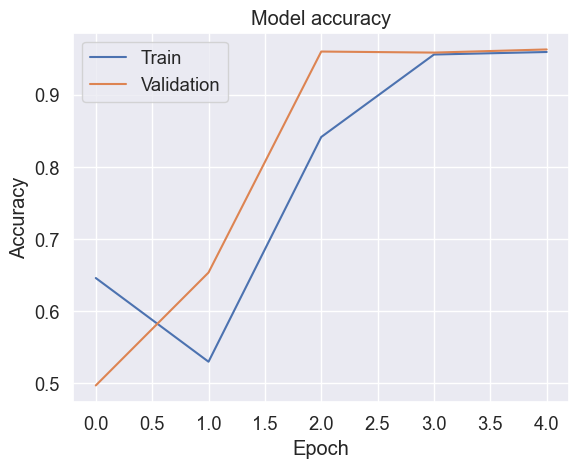

In [94]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

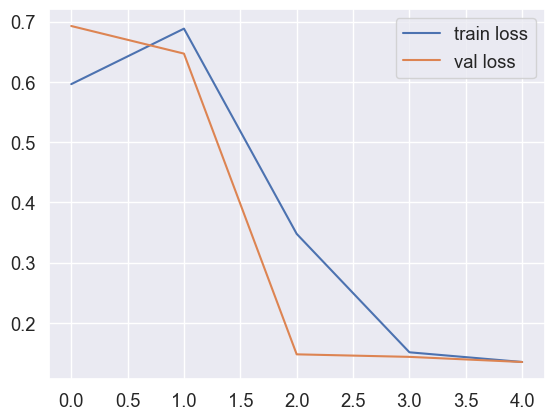

<Figure size 640x480 with 0 Axes>

In [95]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 88ms/step


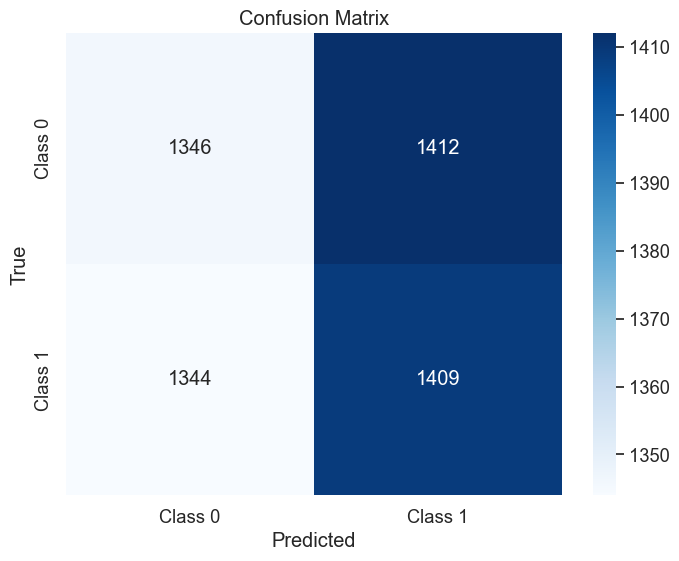

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

sns.set(font_scale=1.2)
y_val_pred = loaded_model.predict(val_gen)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)

confusion_mtx = confusion_matrix(y_val_actual, y_val_pred_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
                                                           #Xception Model - SGD Vanilla

In [97]:
import tensorflow as tf
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential

base_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(224,224,3),activation='relu',padding="same"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(224,224,3),activation='relu',padding="same"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Conv2D(filters=128, kernel_size=(3,3),input_shape=(224,224,3),activation='relu',padding="same"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Conv2D(filters=256, kernel_size=(3,3),input_shape=(224,224,3),activation='relu',padding="same"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
# Adding dropout to minimize overfitting issue
model.add(Dropout(0.2))
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

epochs = 5 
batch_size = 32
history = model.fit(
    train_gen,    validation_data=val_gen,    epochs=epochs,    batch_size=batch_size,    verbose=1
)

test_loss, test_accuracy = model.evaluate(x_val, y_val)
print(f"Test Accuracy: {test_accuracy:.4f}")

C:\Program Files\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_80 (Conv2D)                   │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_60 (MaxPooling2D)      │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_81 (Conv2D)                   │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_61 (MaxPooling2D)      │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_82 (Conv2D)                   │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_62 (MaxPooling2D)      │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_83 (Conv2D)                   │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_63 (MaxPooling2D)      │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_16 (Flatten)                 │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_65 (Dense)                     │ (None, 128)                 │       6,422,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_66 (Dense)                     │ (None, 50)                  │           6,450 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_31 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_67 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,817,573 (26.01 MB)

 Trainable params: 6,817,573 (26.01 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 221s 320ms/step - accuracy: 0.5475 - loss: 0.6865 - val_accuracy: 0.6861 - val_loss: 0.6217
Epoch 2/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 224s 325ms/step - accuracy: 0.6866 - loss: 0.5997 - val_accuracy: 0.9087 - val_loss: 0.2438
Epoch 3/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 222s 322ms/step - accuracy: 0.9166 - loss: 0.2637 - val_accuracy: 0.9358 - val_loss: 0.1701
Epoch 4/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 223s 323ms/step - accuracy: 0.9299 - loss: 0.2054 - val_accuracy: 0.9450 - val_loss: 0.1638
Epoch 5/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 221s 321ms/step - accuracy: 0.9361 - loss: 0.1890 - val_accuracy: 0.9448 - val_loss: 0.1691
173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 87ms/step - accuracy: 0.4997 - loss: 305.4015
Test Accuracy: 0.5003


In [98]:
model.save("Xception Model - SGD Vanilla.h5")

In [99]:
loaded_model = tf.keras.models.load_model("Xception Model - SGD Vanilla.h5")

In [100]:
loaded_model.evaluate(val_gen)

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 84ms/step - accuracy: 0.9401 - loss: 0.1769


[0.16823351383209229, 0.9448375701904297]

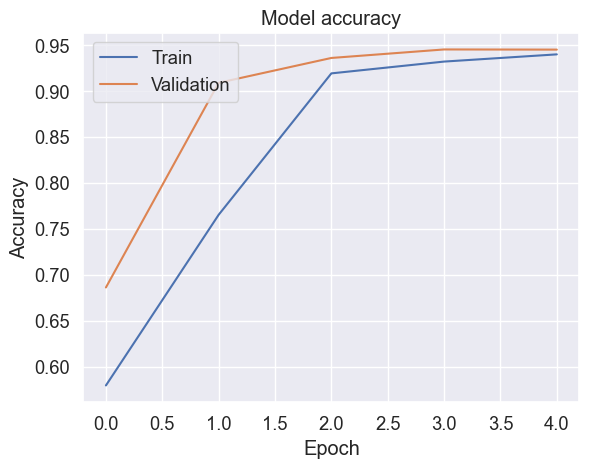

In [101]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

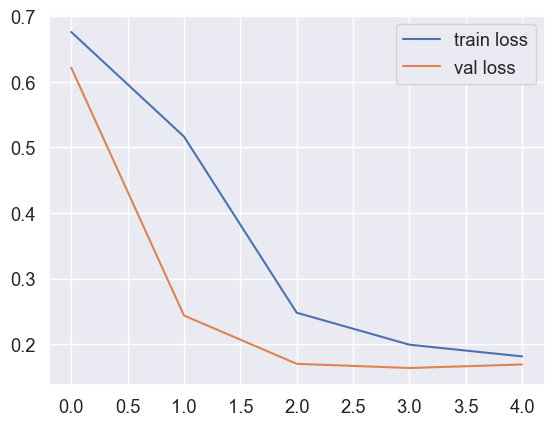

<Figure size 640x480 with 0 Axes>

In [102]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step


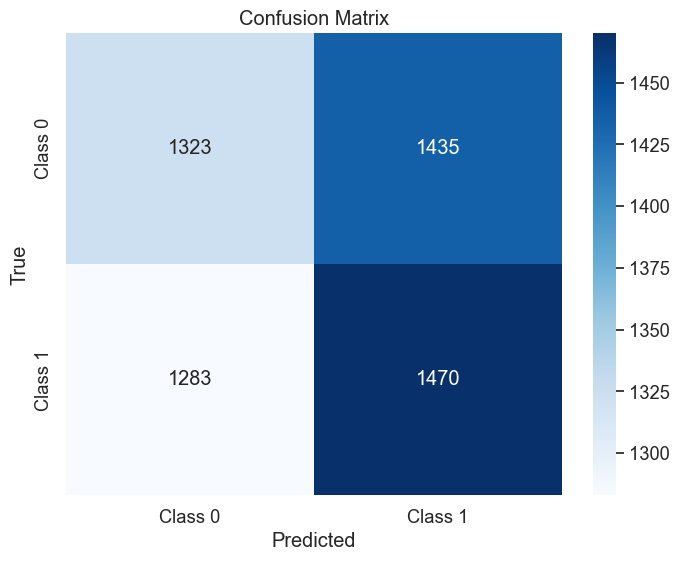

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

sns.set(font_scale=1.2)
y_val_pred = loaded_model.predict(val_gen)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)

confusion_mtx = confusion_matrix(y_val_actual, y_val_pred_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [32]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential

# Assuming you have defined 'train_gen', 'val_gen', 'x_val', and 'y_val'

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(224, 224, 3), activation='relu', padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with appropriate loss and metrics
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])

model.summary()

epochs = 5
batch_size = 32

history = model.fit(
    train_gen, validation_data=val_gen, epochs=epochs, batch_size=batch_size, verbose=1
)

# Evaluate the model on validation data
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print(f"Test Accuracy: {test_accuracy:.4f}")


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │       6,422,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 50)                  │           6,450 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,817,573 (26.01 MB)

 Trainable params: 6,817,573 (26.01 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5


C:\Program Files\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


689/689 ━━━━━━━━━━━━━━━━━━━━ 227s 327ms/step - accuracy: 0.6659 - loss: 0.5540 - val_accuracy: 0.9588 - val_loss: 0.1410
Epoch 2/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 225s 327ms/step - accuracy: 0.9527 - loss: 0.1504 - val_accuracy: 0.9528 - val_loss: 0.1535
Epoch 3/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 224s 324ms/step - accuracy: 0.9609 - loss: 0.1194 - val_accuracy: 0.9612 - val_loss: 0.1260
Epoch 4/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 225s 326ms/step - accuracy: 0.9642 - loss: 0.1067 - val_accuracy: 0.9617 - val_loss: 0.1374
Epoch 5/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 230s 333ms/step - accuracy: 0.9633 - loss: 0.1075 - val_accuracy: 0.9575 - val_loss: 0.1367
173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 84ms/step - accuracy: 0.6832 - loss: 68.3198
Test Accuracy: 0.6821


In [36]:
model.save("new.keras")

In [3]:
import tensorflow as tf
category = ['Uninfected', 'Parasitized']
def prepare(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = img_array / 255
    new_array = cv2.resize(img_array, (224, 224))
    return new_array.reshape(-1, 224, 224, 3)

model = tf.keras.models.load_model("Models/Xception Model - Adam.h5")

In [6]:
import cv2 
prediction = model.predict([prepare("test para.png")])

if np.argmax(prediction) == 1:
    print("Infected")
else:
    print("Uninfected")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Uninfected


In [ ]:
# vgg19